# Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Loading Dataset

In [2]:
traffic_data = pd.read_csv('/content/US_Accidents_March23_sampled_500k.csv')

<ipython-input-2-c9baa52bc895>:1: DtypeWarning: Columns (29,30,31,32,33,34,35,36,37,38,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  traffic_data = pd.read_csv('/content/US_Accidents_March23_sampled_500k.csv')


In [3]:
print(traffic_data)

              ID   Source  Severity                     Start_Time  \
0      A-2047758  Source2         2            2019-06-12 10:10:56   
1      A-4694324  Source1         2  2022-12-03 23:37:14.000000000   
2      A-5006183  Source1         2  2022-08-20 13:13:00.000000000   
3      A-4237356  Source1         2            2022-02-21 17:43:04   
4      A-6690583  Source1         2            2020-12-04 01:46:00   
...          ...      ...       ...                            ...   
82435  A-2065530  Source2         3            2019-06-21 12:35:21   
82436  A-4602225  Source1         2            2023-01-23 04:23:00   
82437  A-1394391  Source2         2            2020-07-21 11:00:23   
82438  A-1936008  Source2         2            2019-08-27 08:38:17   
82439   A-940255  Source3         2            2021-08-11 16:35:54   

                            End_Time  Start_Lat   Start_Lng    End_Lat  \
0                2019-06-12 10:55:58  30.641211  -91.153481        NaN   
1      2022

# Data Cleaning

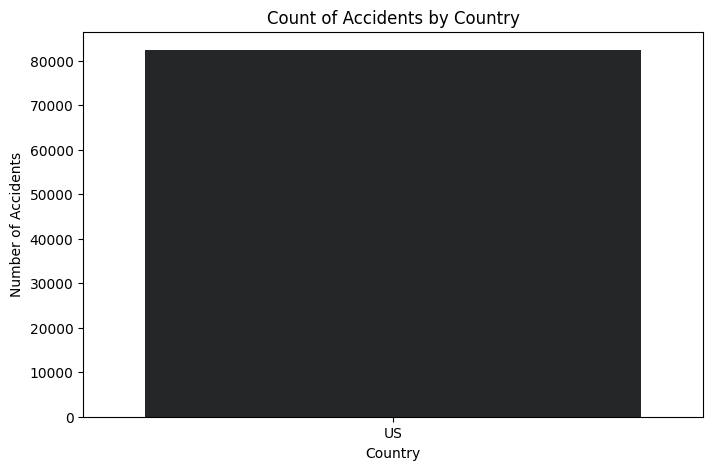

In [4]:
# Bar chart of country
country_counts = traffic_data['Country'].value_counts()

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=country_counts.index, y=country_counts.values, hue=country_counts.index, palette='dark:skyblue')

plt.xlabel("Country")
plt.ylabel("Number of Accidents")
plt.title("Count of Accidents by Country")
plt.show()

## Drop useless columns

In [5]:
traffic_data = traffic_data.drop(['Source', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Street', 'County', 'Country', 'Timezone', 'Airport_Code', 'Wind_Chill(F)', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'], axis=1)
print(traffic_data.shape)

(82440, 31)


## Removing Missing Values

In [6]:
print(traffic_data.columns)

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Distance(mi)',
       'Description', 'City', 'State', 'Zipcode', 'Weather_Timestamp',
       'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop'],
      dtype='object')


In [7]:
missing_values = traffic_data.isnull().sum()
print(missing_values[missing_values > 0], '\n')

missing_percentage = (traffic_data.isna().sum() / len(traffic_data)) * 100
print(missing_percentage.sort_values(ascending=False))

City                     1
State                    1
Zipcode                 16
Weather_Timestamp     1241
Temperature(F)        1723
Humidity(%)           1845
Pressure(in)          1447
Visibility(mi)        1868
Wind_Direction        1818
Wind_Speed(mph)       6029
Precipitation(in)    23483
Weather_Condition     1845
Amenity                  1
Bump                     1
Crossing                 1
Give_Way                 1
Junction                 1
No_Exit                  1
Railway                  1
Roundabout               1
Station                  1
Stop                     1
Traffic_Calming          1
Traffic_Signal           1
Turning_Loop             1
dtype: int64 

Precipitation(in)    28.484959
Wind_Speed(mph)       7.313197
Visibility(mi)        2.265890
Humidity(%)           2.237991
Weather_Condition     2.237991
Wind_Direction        2.205240
Temperature(F)        2.090005
Pressure(in)          1.755216
Weather_Timestamp     1.505337
Zipcode               0.019408


In [8]:
traffic_data_cleaned = traffic_data.dropna()
print(traffic_data_cleaned.shape)

(57496, 31)


## Data Sampling

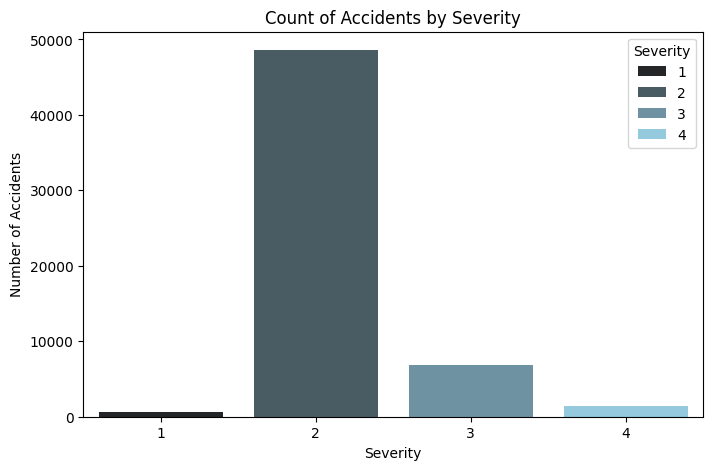

In [9]:
# Bar chart of severity
severity_counts = traffic_data_cleaned['Severity'].value_counts()

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=severity_counts.index, y=severity_counts.values, hue=severity_counts.index, palette='dark:skyblue')

plt.xlabel("Severity")
plt.ylabel("Number of Accidents")
plt.title("Count of Accidents by Severity")
plt.show()

In [10]:
# Randomly sample 10,000 rows
sampled_data = traffic_data_cleaned.sample(n=10000, random_state=42)

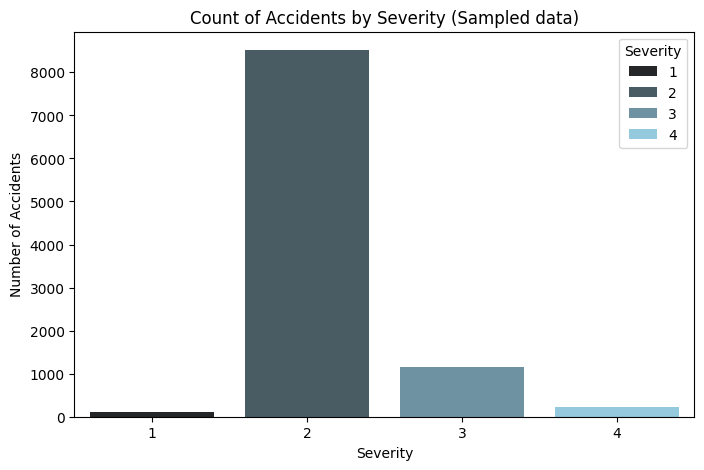

In [11]:
# Bar chart of severity
sampled_severity_counts = sampled_data['Severity'].value_counts()

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=sampled_severity_counts.index, y=sampled_severity_counts.values, hue=sampled_severity_counts.index, palette='dark:skyblue')

plt.xlabel("Severity")
plt.ylabel("Number of Accidents")
plt.title("Count of Accidents by Severity (Sampled data)")
plt.show()

#Data Preparation

## Data Encoding for Start_Time Column (convert to minutes after midnight)

In [12]:
# Check data type of Start_Time
print(sampled_data['Start_Time'].dtype)

#Convert Start_Time to datetime
sampled_data['Start_Time'] = sampled_data['Start_Time'].str.split('.').str[0]  # Remove nanoseconds
sampled_data['Start_Time'] = pd.to_datetime(sampled_data['Start_Time'], format='%Y-%m-%d %H:%M:%S')

# Check data type of Start_Time
print(sampled_data['Start_Time'].dtype)

object
datetime64[ns]


In [13]:
#Convert to Minutes After Midnight
sampled_data['Start_Time'] = (
    sampled_data['Start_Time'].dt.hour * 60 + sampled_data['Start_Time'].dt.minute
)

print(sampled_data['Start_Time'])

55864     427
43860    1183
42432     411
13657     942
66000    1001
         ... 
39844     865
67940     679
82230     998
69296    1074
62147     901
Name: Start_Time, Length: 10000, dtype: int32


##Data Encoding for End_Time Column (convert to minutes after midnight)

In [14]:
# Check data type of End_Time
print(sampled_data['End_Time'].dtype)

#Convert End_Time to datetime
sampled_data['End_Time'] = sampled_data['End_Time'].str.split('.').str[0]  # Remove nanoseconds
sampled_data['End_Time'] = pd.to_datetime(sampled_data['End_Time'], format='%Y-%m-%d %H:%M:%S')

# Check data type of End_Time
print(sampled_data['End_Time'].dtype)

object
datetime64[ns]


In [15]:
#Convert to Minutes After Midnight
sampled_data['End_Time'] = (
    sampled_data['End_Time'].dt.hour * 60 + sampled_data['End_Time'].dt.minute
)

print(sampled_data['End_Time'])

55864     579
43860    1211
42432     439
13657    1080
66000    1155
         ... 
39844     955
67940     810
82230    1043
69296    1101
62147    1126
Name: End_Time, Length: 10000, dtype: int32


##Compute Duration Column using Start_Time and End_Time

In [16]:
sampled_data['Duration'] = sampled_data['End_Time'] - sampled_data['Start_Time']

print(sampled_data['Duration'])

55864    152
43860     28
42432     28
13657    138
66000    154
        ... 
39844     90
67940    131
82230     45
69296     27
62147    225
Name: Duration, Length: 10000, dtype: int32


##Encode Zipcode into Region using First Digit

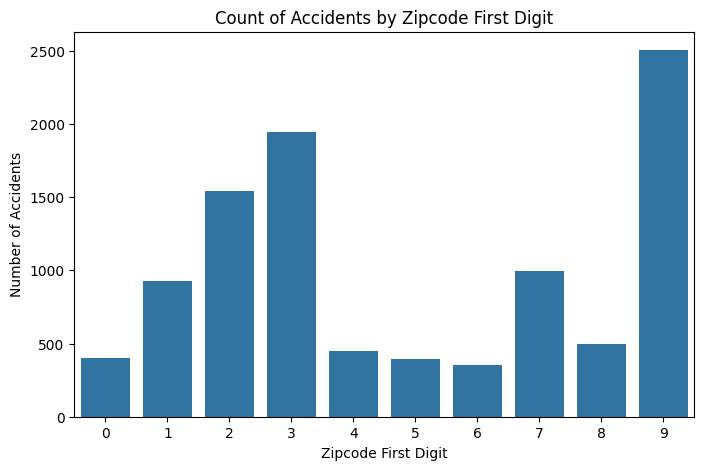

In [17]:
# Bar chart of zipcode
# Extract the first digit of the zip code (assuming the zip code is a string or integer)
sampled_data['Region'] = sampled_data['Zipcode'].str[0]

zipcode_counts = sampled_data['Region'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=zipcode_counts.index, y=zipcode_counts.values)

plt.xlabel("Zipcode First Digit")
plt.ylabel("Number of Accidents")
plt.title("Count of Accidents by Zipcode First Digit")
plt.show()

##Encode 'State' into Top 3 States and None of the Above

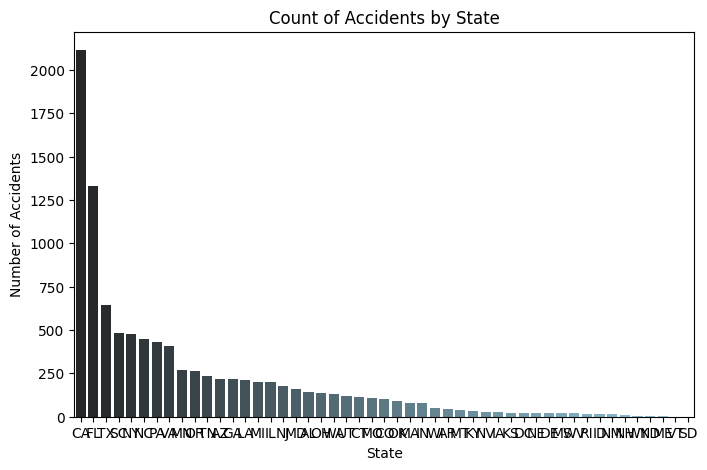

In [18]:
# Bar chart of state
state_counts = sampled_data['State'].value_counts()

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=state_counts.index, y=state_counts.values, hue=state_counts.index, palette='dark:skyblue')

plt.xlabel("State")
plt.ylabel("Number of Accidents")
plt.title("Count of Accidents by State")
plt.show()

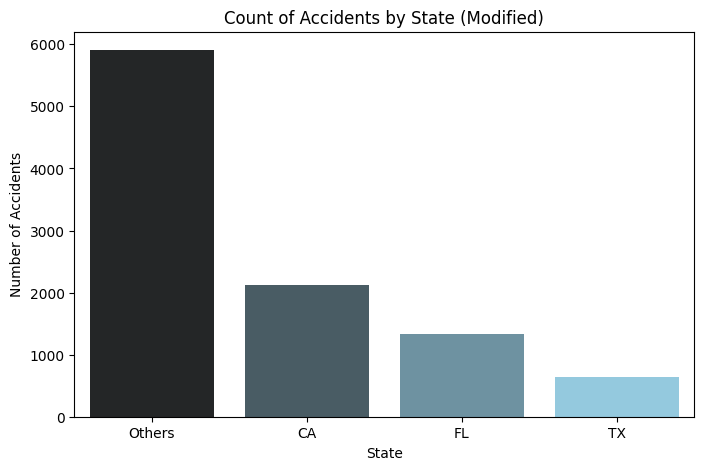

In [19]:
# Get the top 3 states
top_3 = state_counts.nlargest(3)

# Create a mapping where top 3 states are kept, and others are labeled as 'Others'
state_mapping = state_counts.index.to_series().apply(lambda x: x if x in top_3.index else 'Others')

# Apply the mapping to the 'State' column
sampled_data['State'] = sampled_data['State'].map(state_mapping)

# new Bar Chart for State
state_counts = sampled_data['State'].value_counts()
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=state_counts.index, y=state_counts.values, hue=state_counts.index, palette='dark:skyblue')

plt.xlabel("State")
plt.ylabel("Number of Accidents")
plt.title("Count of Accidents by State (Modified)")
plt.show()

In [20]:
# Perform One-Hot Encoding on the 'State' column
state_dummies = pd.get_dummies(sampled_data['State'], prefix='State')

# Convert True/False to 1/0 explicitly
state_dummies = state_dummies.astype(int)

# Concatenate the new columns with the original dataframe
sampled_data = pd.concat([sampled_data, state_dummies], axis=1)

# Drop the original 'State' column
sampled_data.drop(columns=['State'], inplace=True)

#print(sampled_data.head())

##Encode 'City' into Top 5 Cities and None of the above

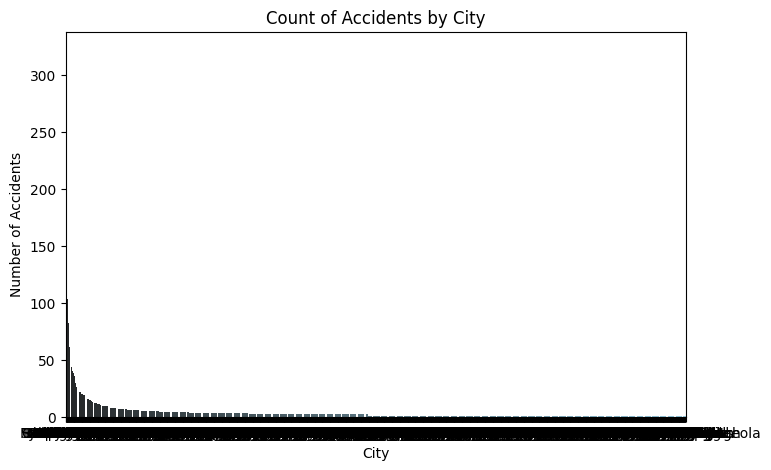

In [21]:
# Bar chart of city
city_counts = sampled_data['City'].value_counts()

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=city_counts.index, y=city_counts.values, hue=city_counts.index, palette='dark:skyblue')

plt.xlabel("City")
plt.ylabel("Number of Accidents")
plt.title("Count of Accidents by City")
plt.show()

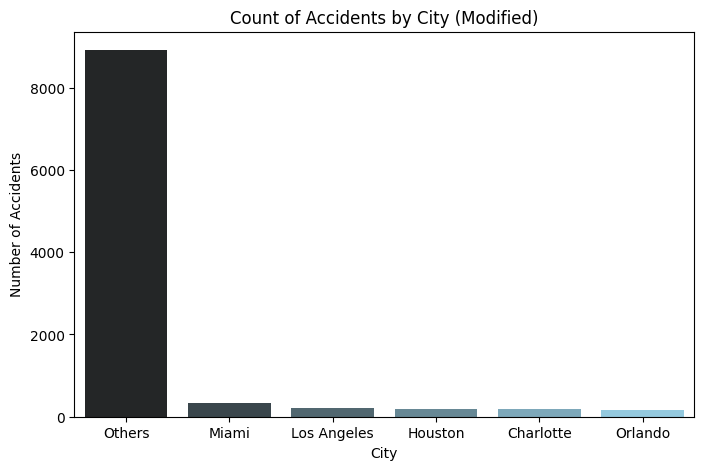

In [22]:
# Get the top 5 cities
top_5 = city_counts.nlargest(5)

# Create a mapping where top 5 cities are kept, and others are labeled as 'Others'
city_mapping = city_counts.index.to_series().apply(lambda x: x if x in top_5.index else 'Others')

# Apply the mapping to the 'City' column
sampled_data['City'] = sampled_data['City'].map(city_mapping)

# new Bar Chart for City
city_counts = sampled_data['City'].value_counts()
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=city_counts.index, y=city_counts.values, hue=city_counts.index, palette='dark:skyblue')

plt.xlabel("City")
plt.ylabel("Number of Accidents")
plt.title("Count of Accidents by City (Modified)")
plt.show()

In [23]:
# Perform One-Hot Encoding on the 'City' column
city_dummies = pd.get_dummies(sampled_data['City'], prefix='City')

# Convert True/False to 1/0 explicitly
city_dummies = city_dummies.astype(int)

# Concatenate the new columns with the original dataframe
sampled_data = pd.concat([sampled_data, city_dummies], axis=1)

# Drop the original 'City' column
sampled_data.drop(columns=['City'], inplace=True)

#print(sampled_data.head())

## Cluster 'Weather_Condition' into 5 Broad Categories then One-Hot Encoding


In [24]:
print(sampled_data['Weather_Condition'].unique())

['Mostly Cloudy' 'Partly Cloudy' 'Cloudy' 'Light Rain' 'Fair'
 'Mostly Cloudy / Windy' 'Overcast' 'Light Snow' 'Shallow Fog'
 'Heavy T-Storm' 'Fair / Windy' 'Heavy Snow' 'Light Drizzle'
 'Showers in the Vicinity' 'Rain' 'N/A Precipitation' 'Snow'
 'Rain / Windy' 'Smoke' 'Mist' 'Thunder in the Vicinity'
 'Partly Cloudy / Windy' 'Fog' 'T-Storm' 'Thunder' 'Cloudy / Windy' 'Haze'
 'Thunder / Windy' 'Heavy T-Storm / Windy' 'Squalls / Windy'
 'Light Rain with Thunder' 'Heavy Rain' 'Blowing Snow / Windy'
 'Heavy Rain / Windy' 'Wintry Mix' 'Haze / Windy' 'Light Freezing Rain'
 'Hail' 'Light Rain / Windy' 'Light Snow / Windy' 'Heavy Snow / Windy'
 'Light Thunderstorms and Rain' 'Sand / Dust Whirlwinds'
 'Scattered Clouds' 'Heavy Thunderstorms and Rain' 'T-Storm / Windy'
 'Clear' 'Thunderstorm' 'Drizzle' 'Fog / Windy' 'Snow and Sleet'
 'Wintry Mix / Windy' 'Light Rain Shower' 'Heavy Drizzle' 'Snow / Windy'
 'Sleet' 'Patches of Fog' 'Light Freezing Drizzle'
 'Thunderstorms and Rain' 'Blowing Snow

In [25]:
# Mapping for standardizing weather conditions to 5 categories and "Others"
weather_mapping = {
    # Cloud is grouped in the same category as Clear as cloudy doesnt really affect traffic conditions that much
    'Clear': 'Clear / Cloudy', 'Cloudy': 'Clear / Cloudy', 'Partly Cloudy': 'Clear / Cloudy',
    'Mostly Cloudy': 'Clear / Cloudy', 'Overcast': 'Clear / Cloudy',

    'Light Rain': 'Rain', 'Rain': 'Rain', 'Heavy Rain': 'Rain', 'Light Rain Shower': 'Rain',
    'Rain / Windy': 'Rain', 'Heavy Rain / Windy': 'Rain', 'Drizzle': 'Rain',
    'Light Freezing Drizzle': 'Rain', 'Light Rain with Thunder': 'Rain', 'Light Drizzle': 'Rain',
    'Light Freezing Rain': 'Rain', 'Freezing Drizzle': 'Rain',

    'Light Snow': 'Snow', 'Snow': 'Snow', 'Heavy Snow': 'Snow', 'Snow / Windy': 'Snow',
    'Light Snow Shower': 'Snow', 'Snow Grains': 'Snow', 'Blowing Snow': 'Snow',
    'Light Snow / Windy': 'Snow', 'Heavy Snow / Windy': 'Snow', 'Light Snow with Thunder': 'Snow',
    'Light Snow and Sleet': 'Snow', 'Snow and Sleet': 'Snow',
    'Light Snow Showers': 'Snow', 'Light Snow and Sleet / Windy': 'Snow', 'Snow and Sleet / Windy': 'Snow',
    'Sleet': 'Snow', 'Light Sleet': 'Snow', 'Light Snow Showers': 'Snow',
    'Blowing Snow': 'Snow', 'Drifting Snow / Windy': 'Snow',

    'Fog': 'Fog / Low Visibility', 'Shallow Fog': 'Fog / Low Visibility', 'Mist': 'Fog / Low Visibility',
    'Light Freezing Fog': 'Fog / Low Visibility', 'Fog / Windy': 'Fog / Low Visibility',
    'Partial Fog / Windy': 'Fog / Low Visibility', 'Drizzle and Fog': 'Fog / Low Visibility',

    'Thunderstorm': 'Thunderstorms / Severe Weather', 'T-Storm': 'Thunderstorms / Severe Weather',
    'Heavy T-Storm': 'Thunderstorms / Severe Weather', 'Thunderstorms and Rain': 'Thunderstorms / Severe Weather',
    'Light Thunderstorms and Rain': 'Thunderstorms / Severe Weather', 'Thunder / Windy': 'Thunderstorms / Severe Weather',
    'Thunder in the Vicinity': 'Thunderstorms / Severe Weather', 'Heavy Thunderstorms and Rain': 'Thunderstorms / Severe Weather',
    'Tornado': 'Thunderstorms / Severe Weather', 'Thunder / Wintry Mix': 'Thunderstorms / Severe Weather', 'Light Thunderstorms and Snow': 'Thunderstorms / Severe Weather',

    # Grouping other categories as "Others"
    'Hail': 'Others', 'Squalls': 'Others', 'Volcanic Ash': 'Others',
    'Blowing Dust': 'Others', 'Smoke': 'Others', 'Haze': 'Others', 'Blowing Dust / Windy': 'Others',
    'Sand / Dust Whirlwinds': 'Others', 'Squalls / Windy': 'Others', 'Light Ice Pellets': 'Others',
    'Widespread Dust': 'Others', 'Smoke / Windy': 'Others', 'Widespread Dust / Windy': 'Others',
    'Drizzle / Windy': 'Others', 'Small Hail': 'Others'
}

sampled_data['Weather_Condition'] = sampled_data['Weather_Condition'].map(weather_mapping).fillna('Others')

# Label Encoding (for random forest model)
label_encoder = LabelEncoder()
sampled_data['Weather_Condition_Encoded'] = label_encoder.fit_transform(sampled_data['Weather_Condition'])

#print(sampled_data['Weather_Condition'])
#print(sampled_data['Weather_Condition_Encoded'])

In [26]:
# Perform One-Hot Encoding on the 'Weather_Condition' column
weather_condition_dummies = pd.get_dummies(sampled_data['Weather_Condition'], prefix='Weather_Condition')

# Convert True/False to 1/0 explicitly
weather_condition_dummies = weather_condition_dummies.astype(int)

# Concatenate the new columns with the original dataframe
sampled_data = pd.concat([sampled_data, weather_condition_dummies], axis=1)

# Drop the original 'Weather_Condition' column
sampled_data.drop(columns=['Weather_Condition'], inplace=True)

print(sampled_data.head())

              ID  Severity  Start_Time  End_Time  Distance(mi)  \
55864  A-6197796         2         427       579         2.670   
43860  A-7763073         2        1183      1211         0.113   
42432  A-7713888         2         411       439         4.995   
13657  A-6161580         2         942      1080         0.105   
66000  A-6528232         2        1001      1155         0.243   

                                             Description     Zipcode  \
55864  Stationary traffic on I-840 E from Sulphur Spr...       37129   
43860  Ramp to Garden Grove Fwy - Accident. Lane bloc...       92868   
42432  Between US-40/Exit 82 and US-29/Exit 87 - Acci...       21104   
13657  Incident on 145TH E AVE near HOUSE 1500 Drive ...  74108-1306   
66000  SB 101 JNO RIVER. [FSP] has closed their incid...       95403   

         Weather_Timestamp  Temperature(F)  Humidity(%)  ...  City_Miami  \
55864  2021-03-10 06:53:00            53.0         45.0  ...           0   
43860  2019-07-23 

## Convert Boolean Columns from "True"/"False" to 1/0

In [27]:
boolean_columns = [
    'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
    'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop'
]

# Convert string 'True'/'False' to actual boolean values
sampled_data[boolean_columns] = sampled_data[boolean_columns].replace({'True': True, 'False': False})

# Convert True/False to 1/0 for the specified columns
sampled_data[boolean_columns] = sampled_data[boolean_columns].astype(int)

# print(sampled_data[boolean_columns].head())

<ipython-input-27-22ac88fd9a7f>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sampled_data[boolean_columns] = sampled_data[boolean_columns].replace({'True': True, 'False': False})


#Train, Validate, Test Split (80-10-10)

In [28]:
# Split the data into training (80%) and temporary set (20%)
train_data, temp_data = train_test_split(sampled_data, test_size=0.2, random_state=42)

# Split the temporary set into validation (50%) and test (50%) — both 10% of the total data
validate_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# Check the shapes of the resulting sets
print("Training Set Shape:", train_data.shape)
print("Validation Set Shape:", validate_data.shape)
print("Test Set Shape:", test_data.shape)

Training Set Shape: (8000, 47)
Validation Set Shape: (1000, 47)
Test Set Shape: (1000, 47)


In [29]:
# Save the training dataset
train_data.to_csv("train_data.csv", index=False)

# Save the validation dataset
validate_data.to_csv("validate_data.csv", index=False)

# Save the test dataset
test_data.to_csv("test_data.csv", index=False)